### Вторая часть ДТЗ, Минаков Артём, ПМ19 - 3
### В этой части наконец применим разные модели и сравним их результаты

In [150]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
sb.set_style('whitegrid')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8 

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import preprocessing
from sklearn import metrics
import xgboost
from sklearn.preprocessing import LabelEncoder

In [151]:
x_train = pd.read_csv('/x_train_nn1.csv')
x_test = pd.read_csv('/x_test_nn1.csv')
y_train = pd.read_csv('/y_train_nn1.csv')
y_test = pd.read_csv('/y_test_nn1.csv')


In [152]:
res_models_dict = {'Model Type' : [],
                   'Mean absolute error': [],
                   'Mean absolute percentage error':[],
                   'Mean squared error':[],
                   'R Squared':[],
                   'Adjusted R Squared':[]}

In [153]:
def model_results(x_train, y_train, x_test, y_test, y_pred, model, m_type):
    mae=mean_absolute_error(y_test,y_pred)
    mape=mean_absolute_percentage_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    
    n=x_test.shape[0]
    p=x_test.shape[1] - 1
    adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
    
    print(f'Результаты модели {m_type}')
    print(f'Mean absolute error = {mae:.2f}')
    print(f'Mean absolute percentage error = {mape:.2f}')
    print(f'Mean squared error = {mse:.2f}')
    print(f'R Squared = {R2:.2f}')
    print(f'Adjusted R Squared = {adj_rsquared:.2f}')
    
    res_models_dict["Model Type"].append(m_type)
    res_models_dict["Mean absolute error"].append(round(mae,2))
    res_models_dict['Mean absolute percentage error'].append(round(mape,2))
    res_models_dict['Mean squared error'].append(round(mse,2))
    res_models_dict['R Squared'].append(round(R2,2))
    res_models_dict['Adjusted R Squared'].append(round(adj_rsquared,2))

In [154]:
model1 = LinearRegression()
model1.fit(x_train , y_train)
y_pred1 = model1.predict(x_test)

In [155]:
model_results(x_train, y_train, x_test, y_test, y_pred1, model1, 'Linear Regression')

Результаты модели Linear Regression
Mean absolute error = 51388.70
Mean absolute percentage error = 0.30
Mean squared error = 4924108937.91
R Squared = 0.64
Adjusted R Squared = 0.64


In [156]:
model2 = GradientBoostingRegressor()
model2.fit(x_train , y_train)
y_pred2 = model2.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [157]:
model_results(x_train, y_train, x_test, y_test, y_pred2, model2, 'Gradient Boosting')

Результаты модели Gradient Boosting
Mean absolute error = 39397.15
Mean absolute percentage error = 0.22
Mean squared error = 3194058736.22
R Squared = 0.77
Adjusted R Squared = 0.77


In [158]:
model3 = xgboost.XGBRegressor()
model3.fit(x_train , y_train)
y_pred3 = model3.predict(x_test)

[21:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [159]:
model_results(x_train, y_train, x_test, y_test, y_pred3, model3, 'XGB Regressor')

Результаты модели XGB Regressor
Mean absolute error = 39558.73
Mean absolute percentage error = 0.22
Mean squared error = 3234588286.59
R Squared = 0.76
Adjusted R Squared = 0.76


In [160]:
model4 = DecisionTreeRegressor(criterion="absolute_error")
model4.fit(x_train , y_train)
y_pred4 = model4.predict(x_test)

In [161]:
model_results(x_train, y_train, x_test, y_test, y_pred4, model4, 'Decision Tree Regressor')

Результаты модели Decision Tree Regressor
Mean absolute error = 44544.74
Mean absolute percentage error = 0.23
Mean squared error = 4909578432.83
R Squared = 0.64
Adjusted R Squared = 0.64


In [162]:
res_models_dict

{'Model Type': ['Linear Regression',
  'Gradient Boosting',
  'XGB Regressor',
  'Decision Tree Regressor'],
 'Mean absolute error': [51388.7, 39397.15, 39558.73, 44544.74],
 'Mean absolute percentage error': [0.3, 0.22, 0.22, 0.23],
 'Mean squared error': [4924108937.91,
  3194058736.22,
  3234588286.59,
  4909578432.83],
 'R Squared': [0.64, 0.77, 0.76, 0.64],
 'Adjusted R Squared': [0.64, 0.77, 0.76, 0.64]}

### Далее попробуем применить нейронную сеть и сравним

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf 

In [164]:
X_train.shape

torch.Size([16346, 9])

In [165]:
model=Sequential([
    Dense(9,input_shape=[9] ,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu') ,
    Dense(1)
])

In [166]:
model.compile(optimizer='adam',loss='mean_absolute_percentage_error',metrics=['mse','mae'])

In [167]:
model_history=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=100,epochs=800)

Epoch 1/800
164/164 [==============================] - 2s 5ms/step - loss: 99.7813 - mse: 55799640064.0000 - mae: 206312.2656 - val_loss: 98.1487 - val_mse: 55671390208.0000 - val_mae: 204957.1719
Epoch 2/800
164/164 [==============================] - 1s 3ms/step - loss: 67.4500 - mse: 35397074944.0000 - mae: 148513.2812 - val_loss: 44.6866 - val_mse: 19146102784.0000 - val_mae: 99872.7344
Epoch 3/800
164/164 [==============================] - 1s 4ms/step - loss: 43.6161 - mse: 18362468352.0000 - mae: 97616.1641 - val_loss: 43.4799 - val_mse: 18374592512.0000 - val_mae: 97360.7969
Epoch 4/800
164/164 [==============================] - 1s 4ms/step - loss: 42.4694 - mse: 17624821760.0000 - mae: 95163.6797 - val_loss: 42.3446 - val_mse: 17268768768.0000 - val_mae: 93888.1875
Epoch 5/800
164/164 [==============================] - 1s 4ms/step - loss: 41.2928 - mse: 16850410496.0000 - mae: 92593.2969 - val_loss: 41.1676 - val_mse: 15993095168.0000 - val_mae: 89866.5859
Epoch 6/800
164/164 [=

In [168]:
y_pred_tf=model.predict(x_test)
R2 =r2_score(y_test, y_pred_tf)
R2 

128/128 [==============================] - 0s 2ms/step


0.7331252804355963

In [169]:
losses=pd.DataFrame(model_history.history)

In [170]:
losses.head()

,loss,mse,mae,val_loss,val_mse,val_mae
0,99.781303,5.579964e+10,206312.265625,98.148666,5.567139e+10,204957.171875
1,67.449997,3.539707e+10,148513.281250,44.686577,1.914610e+10,99872.734375
2,43.616051,1.836247e+10,97616.164062,43.479885,1.837459e+10,97360.796875
3,42.469418,1.762482e+10,95163.679688,42.344574,1.726877e+10,93888.187500
4,41.292828,1.685041e+10,92593.296875,41.167599,1.599310e+10,89866.585938


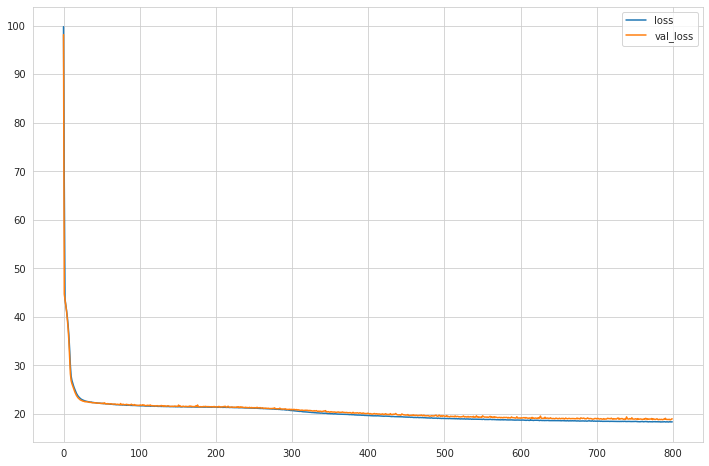

In [171]:
losses[['loss','val_loss']].plot()
plt.show()

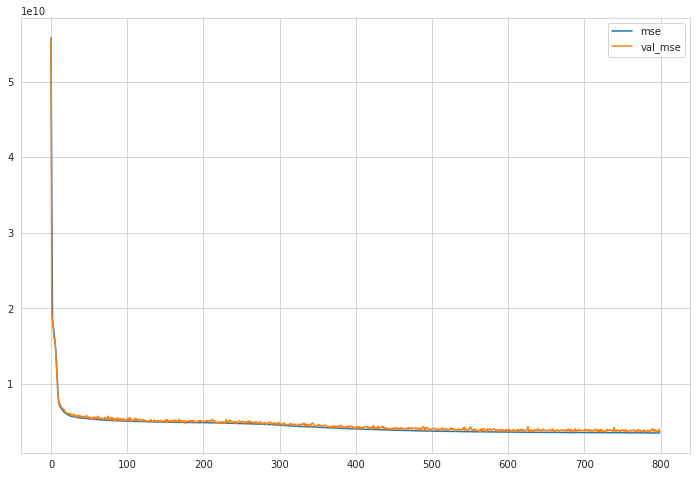

In [172]:
losses[['mse','val_mse']].plot()
plt.show()

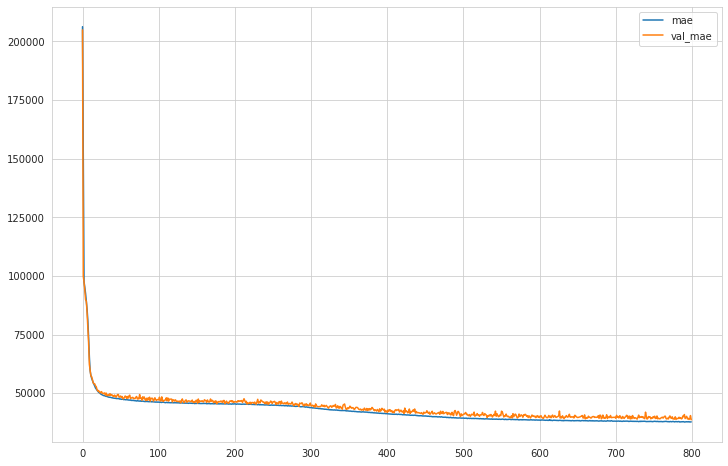

In [173]:
losses[['mae','val_mae']].plot()
plt.show()

In [174]:
mape=mean_absolute_percentage_error(y_test,y_pred_tf)
mape

0.18992666200590322

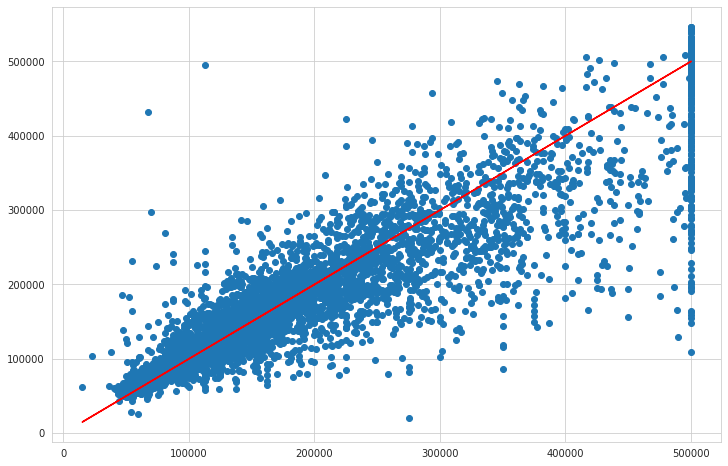

In [175]:
plt.scatter(y_test,y_pred_tf)
plt.plot(y_test,y_test,'r')
plt.show()

In [176]:
model_results(x_train, y_train, x_test, y_test, y_pred_tf, model1, 'TenserFlow NN')

Результаты модели TenserFlow NN
Mean absolute error = 38645.55
Mean absolute percentage error = 0.19
Mean squared error = 3649560037.27
R Squared = 0.73
Adjusted R Squared = 0.73


In [177]:
### Далее попробую на pytorch

In [178]:
import torch
from torch.autograd import Variable
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F  # Functional
from tqdm import tqdm_notebook

In [179]:
X_train = torch.tensor(np.asarray(x_train)).type(torch.float32)
X_test = torch.tensor(np.asarray(x_test)).type(torch.float32)
Y_train = torch.tensor(np.asarray(y_train)).type(torch.float32)
Y_test = torch.tensor(np.asarray(y_test)).type(torch.float32)

In [180]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape,

(torch.Size([16346, 9]),
 torch.Size([16346, 1]),
 torch.Size([4087, 9]),
 torch.Size([4087, 1]))

In [181]:
class pytorchNN(nn.Module):
    
    def __init__(self):
        super(pytorchNN, self).__init__()
        self.layer1 = nn.Linear(9, 64)
        self.layer2 = nn.Linear(64, 64)
        self.out = nn.Linear(64, 1)
    
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.out(x)
        return x

net = pytorchNN()

In [182]:
print(net)

pytorchNN(
  (layer1): Linear(in_features=9, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=1, bias=True)
)


In [183]:
for i in range(len(list(net.parameters()))):
    print(list(net.parameters())[i].shape)

torch.Size([64, 9])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([1, 64])
torch.Size([1])


In [184]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
criterion = nn.L1Loss()

In [187]:
n_epochs = 20
loss_list = [] 

In [188]:
for i in range(n_epochs):
  full_loss = 0

  for n, d in enumerate(zip(X_train, Y_train)):

    optimizer.zero_grad()
    output = net(d[0])
    loss = criterion(output, d[1])
    loss.backward()
    optimizer.step()

    full_loss += loss.item()

  print(f" Номер Эпохи = {i+1}, AVG ошибка = {full_loss / len(X_train)}")
  print('------------------------------------------------')
  loss_list.append((full_loss / len(X_train)))

 Номер Эпохи = 1, AVG ошибка = 54347.40652864233
------------------------------------------------
 Номер Эпохи = 2, AVG ошибка = 50788.4903162232
------------------------------------------------
 Номер Эпохи = 3, AVG ошибка = 47438.41484041633
------------------------------------------------
 Номер Эпохи = 4, AVG ошибка = 46313.0653232251
------------------------------------------------
 Номер Эпохи = 5, AVG ошибка = 45972.34364939244
------------------------------------------------
 Номер Эпохи = 6, AVG ошибка = 45790.79153873654
------------------------------------------------
 Номер Эпохи = 7, AVG ошибка = 45671.51375133347
------------------------------------------------
 Номер Эпохи = 8, AVG ошибка = 45544.33049477414
------------------------------------------------
 Номер Эпохи = 9, AVG ошибка = 45450.355113994825
------------------------------------------------
 Номер Эпохи = 10, AVG ошибка = 45357.65861857928
------------------------------------------------
 Номер Эпохи = 11, A

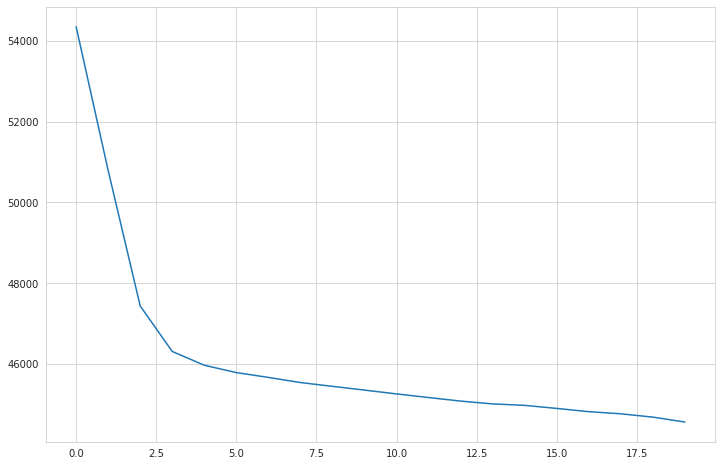

In [189]:
# loss
with torch.no_grad():
  plt.plot(np.arange(len(loss_list))[0:n_epochs], np.array(loss_list)[0:n_epochs])

In [190]:
with torch.no_grad():
  y_pred = net(X_test)

In [191]:
y_pred

tensor([[160019.9375],
        [156789.4688],
        [184887.0312],
        ...,
        [105470.7031],
        [115662.7109],
        [132458.0625]])

In [192]:
model_results(X_train, Y_train, X_test, Y_test, y_pred, model, 'Pytorch NN')

Результаты модели Pytorch NN
Mean absolute error = 45379.06
Mean absolute percentage error = 0.23
Mean squared error = 4606247936.00
R Squared = 0.66
Adjusted R Squared = 0.66


In [193]:
res_models_dict

{'Model Type': ['Linear Regression',
  'Gradient Boosting',
  'XGB Regressor',
  'Decision Tree Regressor',
  'TenserFlow NN',
  'Pytorch NN'],
 'Mean absolute error': [51388.7,
  39397.15,
  39558.73,
  44544.74,
  38645.55,
  45379.06],
 'Mean absolute percentage error': [0.3, 0.22, 0.22, 0.23, 0.19, 0.23],
 'Mean squared error': [4924108937.91,
  3194058736.22,
  3234588286.59,
  4909578432.83,
  3649560037.27,
  4606248000.0],
 'R Squared': [0.64, 0.77, 0.76, 0.64, 0.73, 0.66],
 'Adjusted R Squared': [0.64, 0.77, 0.76, 0.64, 0.73, 0.66]}

In [194]:
pd.DataFrame(res_models_dict)

,Model Type,Mean absolute error,Mean absolute percentage error,Mean squared error,R Squared,Adjusted R Squared
0,Linear Regression,51388.700000,0.30,4.924109e+09,0.64,0.64
1,Gradient Boosting,39397.150000,0.22,3.194059e+09,0.77,0.77
2,XGB Regressor,39558.730000,0.22,3.234588e+09,0.76,0.76
3,Decision Tree Regressor,44544.740000,0.23,4.909578e+09,0.64,0.64
4,TenserFlow NN,38645.550000,0.19,3.649560e+09,0.73,0.73
5,Pytorch NN,45379.058594,0.23,4.606248e+09,0.66,0.66


### Вывод :
### На одинаковых данных традиционные методы машинного обучения в основном проигрывают искуственным нейронным сетям, но некоторые модели, например, градиентного бустинга, показали очень хороший результат, по некоторым метрикам даже лучше, чем результат нейронных сетей.

### В целом результаты исследования очень сильно будут зависеть от изначальных данных, моделей МО, а также архитектуры и времени обучения нейронных сетей. В моём случае удалось достигнуть R Squared больше 70%, а   MAE% около 20, что считаю неплохим результатом, учитывая большую нелинейность в изначальных данных.